In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Load the dataset
file_path = 'C:\\Users\\Gladiator\\Downloads\\Hospice_and_Palliative_Care.csv'
data = pd.read_csv(file_path)

# Step 1: Check for missing values
missing_values = data.isnull().sum()
print("Missing values in each column:\n", missing_values)

# Step 2: Standardize numeric columns (all columns are numeric in this dataset)
scaler = StandardScaler()
numeric_columns = data.columns  # All columns in this dataset are numeric
data_scaled = pd.DataFrame(scaler.fit_transform(data), columns=numeric_columns)

# Display the standardized data
print("\nStandardized data sample:\n", data_scaled.head())


Missing values in each column:
 zip_code                                                0
min_medicare_pricing_for_new_patient                    0
max_medicare_pricing_for_new_patient                    0
mode_medicare_pricing_for_new_patient                   0
min_copay_for_new_patient                               0
max_copay_for_new_patient                               0
mode_copay_for_new_patient                              0
most_utilized_procedure_code_for_new_patient            0
min_medicare_pricing_for_established_patient            0
max_medicare_pricing_for_established_patient            0
mode_medicare_pricing_for_established_patient           0
min_copay_for_established_patient                       0
max_copay_for_established_patient                       0
mode_copay_for_established_patient                      0
most_utilized_procedure_code_for_established_patient    0
dtype: int64

Standardized data sample:
    zip_code  min_medicare_pricing_for_new_patient  \
0 -1

In [2]:
data.describe

<bound method NDFrame.describe of        zip_code  min_medicare_pricing_for_new_patient  \
0           210                                57.752   
1           211                                57.752   
2           212                                57.752   
3           213                                57.752   
4           214                                57.752   
...         ...                                   ...   
42961     99926                                71.336   
42962     99927                                71.336   
42963     99928                                71.336   
42964     99929                                71.336   
42965     99950                                71.336   

       max_medicare_pricing_for_new_patient  \
0                                   174.264   
1                                   174.264   
2                                   174.264   
3                                   174.264   
4                                   174.264   

In [3]:
print(data.head())

   zip_code  min_medicare_pricing_for_new_patient  \
0       210                                57.752   
1       211                                57.752   
2       212                                57.752   
3       213                                57.752   
4       214                                57.752   

   max_medicare_pricing_for_new_patient  \
0                               174.264   
1                               174.264   
2                               174.264   
3                               174.264   
4                               174.264   

   mode_medicare_pricing_for_new_patient  min_copay_for_new_patient  \
0                                174.264                     14.438   
1                                174.264                     14.438   
2                                174.264                     14.438   
3                                174.264                     14.438   
4                                174.264                     14.438

In [9]:
import pandas as pd

# Load the dataset
file_path = 'C:\\Users\\Gladiator\\Downloads\\Hospice_and_Palliative_Care.csv'
data = pd.read_csv(file_path)


pincode_column = 'zip_code' 
cost_column = 'min_medicare_pricing_for_new_patient'        

# Group by Pincode and sum the costs
pincode_cost = data.groupby(pincode_column)[cost_column].sum()

# Find the Pincode with the highest cost
highest_cost_pincode = pincode_cost.idxmax()
highest_cost = pincode_cost.max()

print(f"The zip_code with the highest cost is: {highest_cost_pincode}")
print(f"The highest min_medicare_pricing_for_new_patient is: {highest_cost}")


The zip_code with the highest cost is: 99501
The highest min_medicare_pricing_for_new_patient is: 71.336


In [8]:
import pandas as pd

# Load the dataset
file_path = 'C:\\Users\\Gladiator\\Downloads\\Hospice_and_Palliative_Care.csv'  
data = pd.read_csv(file_path)



pincode_column = 'zip_code'  
cost_column = 'max_medicare_pricing_for_new_patient'       

# Group by Pincode and sum the costs
pincode_cost = data.groupby(pincode_column)[cost_column].sum()

# Find the Pincode with the highest cost
highest_cost_pincode = pincode_cost.idxmax()
highest_cost = pincode_cost.max()

print(f"The zip_code with the highest cost is: {highest_cost_pincode}")
print(f"The highest max_medicare_pricing_for_new_patient is: {highest_cost}")


The zip_code with the highest cost is: 99501
The highest max_medicare_pricing_for_new_patient is: 222.64


Skewness of Columns:
min_medicare_pricing_for_new_patient: 1.65


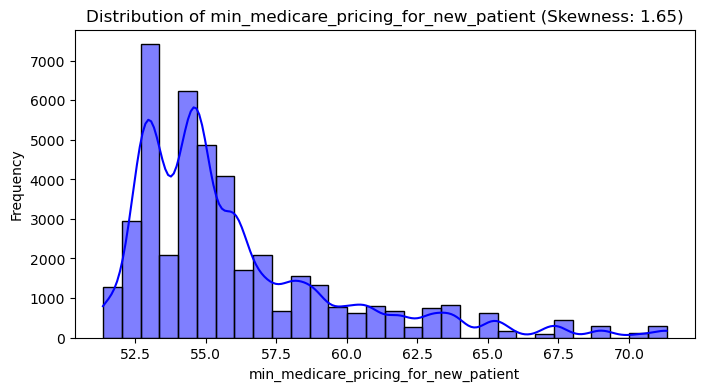

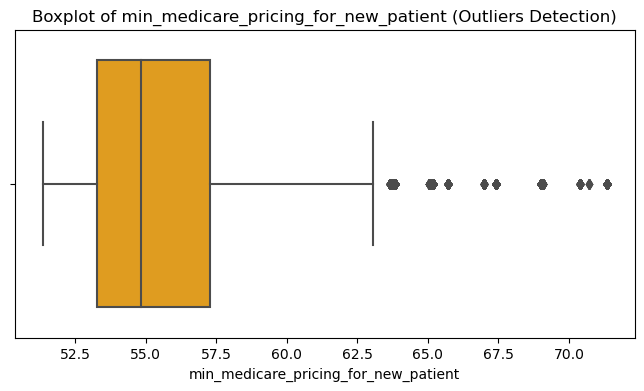

Number of outliers in min_medicare_pricing_for_new_patient: 2815
Cleaned data saved to C:\Users\Gladiator\Downloads\Cleaned_Data.csv


In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew, boxcox

# Load the dataset
file_path = 'C:\\Users\\Gladiator\\Downloads\\Hospice_and_Palliative_Care.csv'  
data = pd.read_csv(file_path)

# Define the columns to analyze
columns_to_analyze = ['min_medicare_pricing_for_new_patient'] 

# Check for skewness
print("Skewness of Columns:")
for col in columns_to_analyze:
    skewness = skew(data[col].dropna())  # Drop NA values for skewness calculation
    print(f"{col}: {skewness:.2f}")

    # Visualization of distribution
    plt.figure(figsize=(8, 4))
    sns.histplot(data[col], kde=True, bins=30, color='blue')
    plt.title(f"Distribution of {col} (Skewness: {skewness:.2f})")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()

# Check for outliers using boxplots
for col in columns_to_analyze:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=data[col], color='orange')
    plt.title(f"Boxplot of {col} (Outliers Detection)")
    plt.xlabel(col)
    plt.show()

# Optional: Removing outliers using IQR
for col in columns_to_analyze:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identify and count outliers
    outliers = data[(data[col] < lower_bound) | (data[col] > upper_bound)]
    print(f"Number of outliers in {col}: {len(outliers)}")

    # Remove outliers if necessary
    data = data[(data[col] >= lower_bound) & (data[col] <= upper_bound)]

# Save cleaned data (optional)
cleaned_file_path = 'C:\\Users\\Gladiator\\Downloads\\Cleaned_Data.csv'
data.to_csv(cleaned_file_path, index=False)
print(f"Cleaned data saved to {cleaned_file_path}")


In [13]:
import pandas as pd

# Load the dataset
file_path = 'C:\\Users\\Gladiator\\Downloads\\Hospice_and_Palliative_Care.csv'  
data = pd.read_csv(file_path)


pincode_column = 'zip_code'  
cost_column = 'min_medicare_pricing_for_new_patient'       
# Ensure the cost column is numeric (in case it's not)
data[cost_column] = pd.to_numeric(data[cost_column], errors='coerce')

# Group by Pincode and sum the costs
pincode_cost = data.groupby(pincode_column)[cost_column].sum().reset_index()

# Sort by cost in descending order
top_10_highest = pincode_cost.sort_values(by=cost_column, ascending=False).head(10)
top_10_lowest = pincode_cost.sort_values(by=cost_column, ascending=True).head(10)

# Display the results
print("Top 10 zip_code with Highest Costs:")
print(top_10_highest)

print("\nTop 10 zip_code with Lowest Costs:")
print(top_10_lowest)


Top 10 zip_code with Highest Costs:
       zip_code  min_medicare_pricing_for_new_patient
42965     99950                                71.336
42785     99629                                71.336
42779     99623                                71.336
42780     99624                                71.336
42781     99625                                71.336
42782     99626                                71.336
42783     99627                                71.336
42784     99628                                71.336
42786     99630                                71.336
42794     99638                                71.336

Top 10 zip_code with Lowest Costs:
       zip_code  min_medicare_pricing_for_new_patient
32128     72846                                 51.36
31953     72531                                 51.36
31952     72530                                 51.36
31951     72529                                 51.36
31950     72528                                 51.36
31949     